**Grupo 1:**
<br>Juana Mejía 
<br>Daniela Espinosa
<br>Pablo Ortega

## Inteligencia de negocios
### Laboratorio 2 - Agrupación

In [166]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.cluster import AgglomerativeClustering # type: ignore
from sklearn.metrics import silhouette_score, davies_bouldin_score # type: ignore
from scipy.cluster.hierarchy import dendrogram, linkage # type: ignore
from sklearn.decomposition import PCA # type: ignore
import plotly.express as px # type: ignore
import seaborn as sns # type: ignore

Carga de datos

In [167]:
df = pd.read_csv('202420_Laboratorio 2 - Agrupación_202420_Laboratorio_2_-_Agrupación_data.csv')

In [168]:
df.shape

(1000, 23)

#### Descripción General de los Datos
Este conjunto de datos médicos contiene información sobre 1000 pacientes con 23 características tanto clínicas como demográficas, con el fin de estimar el tiempo aproximado de hospitalización de un paciente. A continuación, se describen las características de las variables, el perfil de los datos y el análisis de calidad de datos.

In [169]:
pd.set_option('display.max_columns', None)
df.head()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Queja_Principal,Estado_Mental,Dolor,dolor_NRS,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Diagnostico_En_Urgencias,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Duracion_KTAS_Min,Error_Triaje
0,2,2,49,2,1,ant. chest pain,1,1,2,150.0,90.0,92.0,20.0,36.2,98.0,2,Ischaemic chest pain,2,2,0,1591,"2,00",0
1,2,2,30,4,1,headache,1,1,4,140.0,80.0,76.0,20.0,36.3,99.0,3,"Subarachnoid haemorrhage, unspecified",7,3,0,211,"3,00",0
2,2,1,61,3,2,ant. chest pain,1,1,3,100.0,60.0,84.0,20.0,36.4,98.0,4,Contusion of front wall of thorax,1,4,0,119,"2,00",0
3,2,2,61,3,1,headache,1,1,4,120.0,70.0,76.0,20.0,36.5,99.0,4,Headache,1,3,4,414,"2,00",2
4,1,2,67,3,1,fever & chill,1,0,#BOÞ!,143.0,70.0,130.0,20.0,38.1,NaN,4,Fever,1,2,1,267,"3,60",2


#### Estadísticas descriptivas

In [170]:
pd.set_option('display.max_columns', None)
df.describe()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Estado_Mental,Dolor,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Error_Triaje
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,983.000000,979.000000,988.000000,985.000000,989.000000,444.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.450000,1.514000,53.892000,2.811000,1.2000,1.103000,0.562000,133.485249,79.566905,84.400810,19.450761,36.562993,97.047297,3.328000,1.610000,3.260000,0.569000,12792.480000,0.253000
std,0.497743,0.500054,19.826483,0.796186,0.4002,0.431946,0.496389,27.156136,15.174593,16.297428,2.069882,0.519699,4.761112,0.862067,1.161572,0.865534,1.587375,87721.151446,0.630387
min,1.000000,1.000000,16.000000,1.000000,1.0000,1.000000,0.000000,50.000000,31.000000,32.000000,14.000000,35.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,36.000000,2.000000,1.0000,1.000000,0.000000,114.000000,70.000000,73.000000,18.000000,36.200000,97.000000,3.000000,1.000000,3.000000,0.000000,132.750000,0.000000
50%,1.000000,2.000000,56.000000,3.000000,1.0000,1.000000,1.000000,130.000000,80.000000,82.000000,20.000000,36.500000,98.000000,3.000000,1.000000,3.000000,0.000000,270.500000,0.000000
75%,2.000000,2.000000,70.250000,3.000000,1.0000,1.000000,1.000000,150.000000,90.000000,96.000000,20.000000,36.800000,99.000000,4.000000,2.000000,4.000000,0.000000,620.000000,0.000000
max,2.000000,2.000000,94.000000,7.000000,2.0000,4.000000,1.000000,275.000000,160.000000,148.000000,30.000000,39.800000,100.000000,5.000000,7.000000,5.000000,9.000000,709510.000000,2.000000


Las estadísticas descriptivas nos permiten observar varias cosas:

1. **Count** -> Existen valores faltantes en las columnas SBP, DBP, HR, RR, BT, Saturación.
2. **Mean y std** -> Nos permiten tener una primera imagen mental de cómo se distribuyen los datos.
3. **Mean, std, min, max** -> Es evidente que la variable objetivo está extremadamente dispersa y muy posiblemente tiene casos atípicos.

Es importante recalcar que en la tabla se presentan varias estadísticas de las variables categóricas codificadas; sin embargo, muchas de estas, como el promedio y la desviación estándar, no tienen sentido y, por lo tanto, no sirven para sacar conclusiones.

A continuación se observan histogramas de las distribuciones de cada característica.

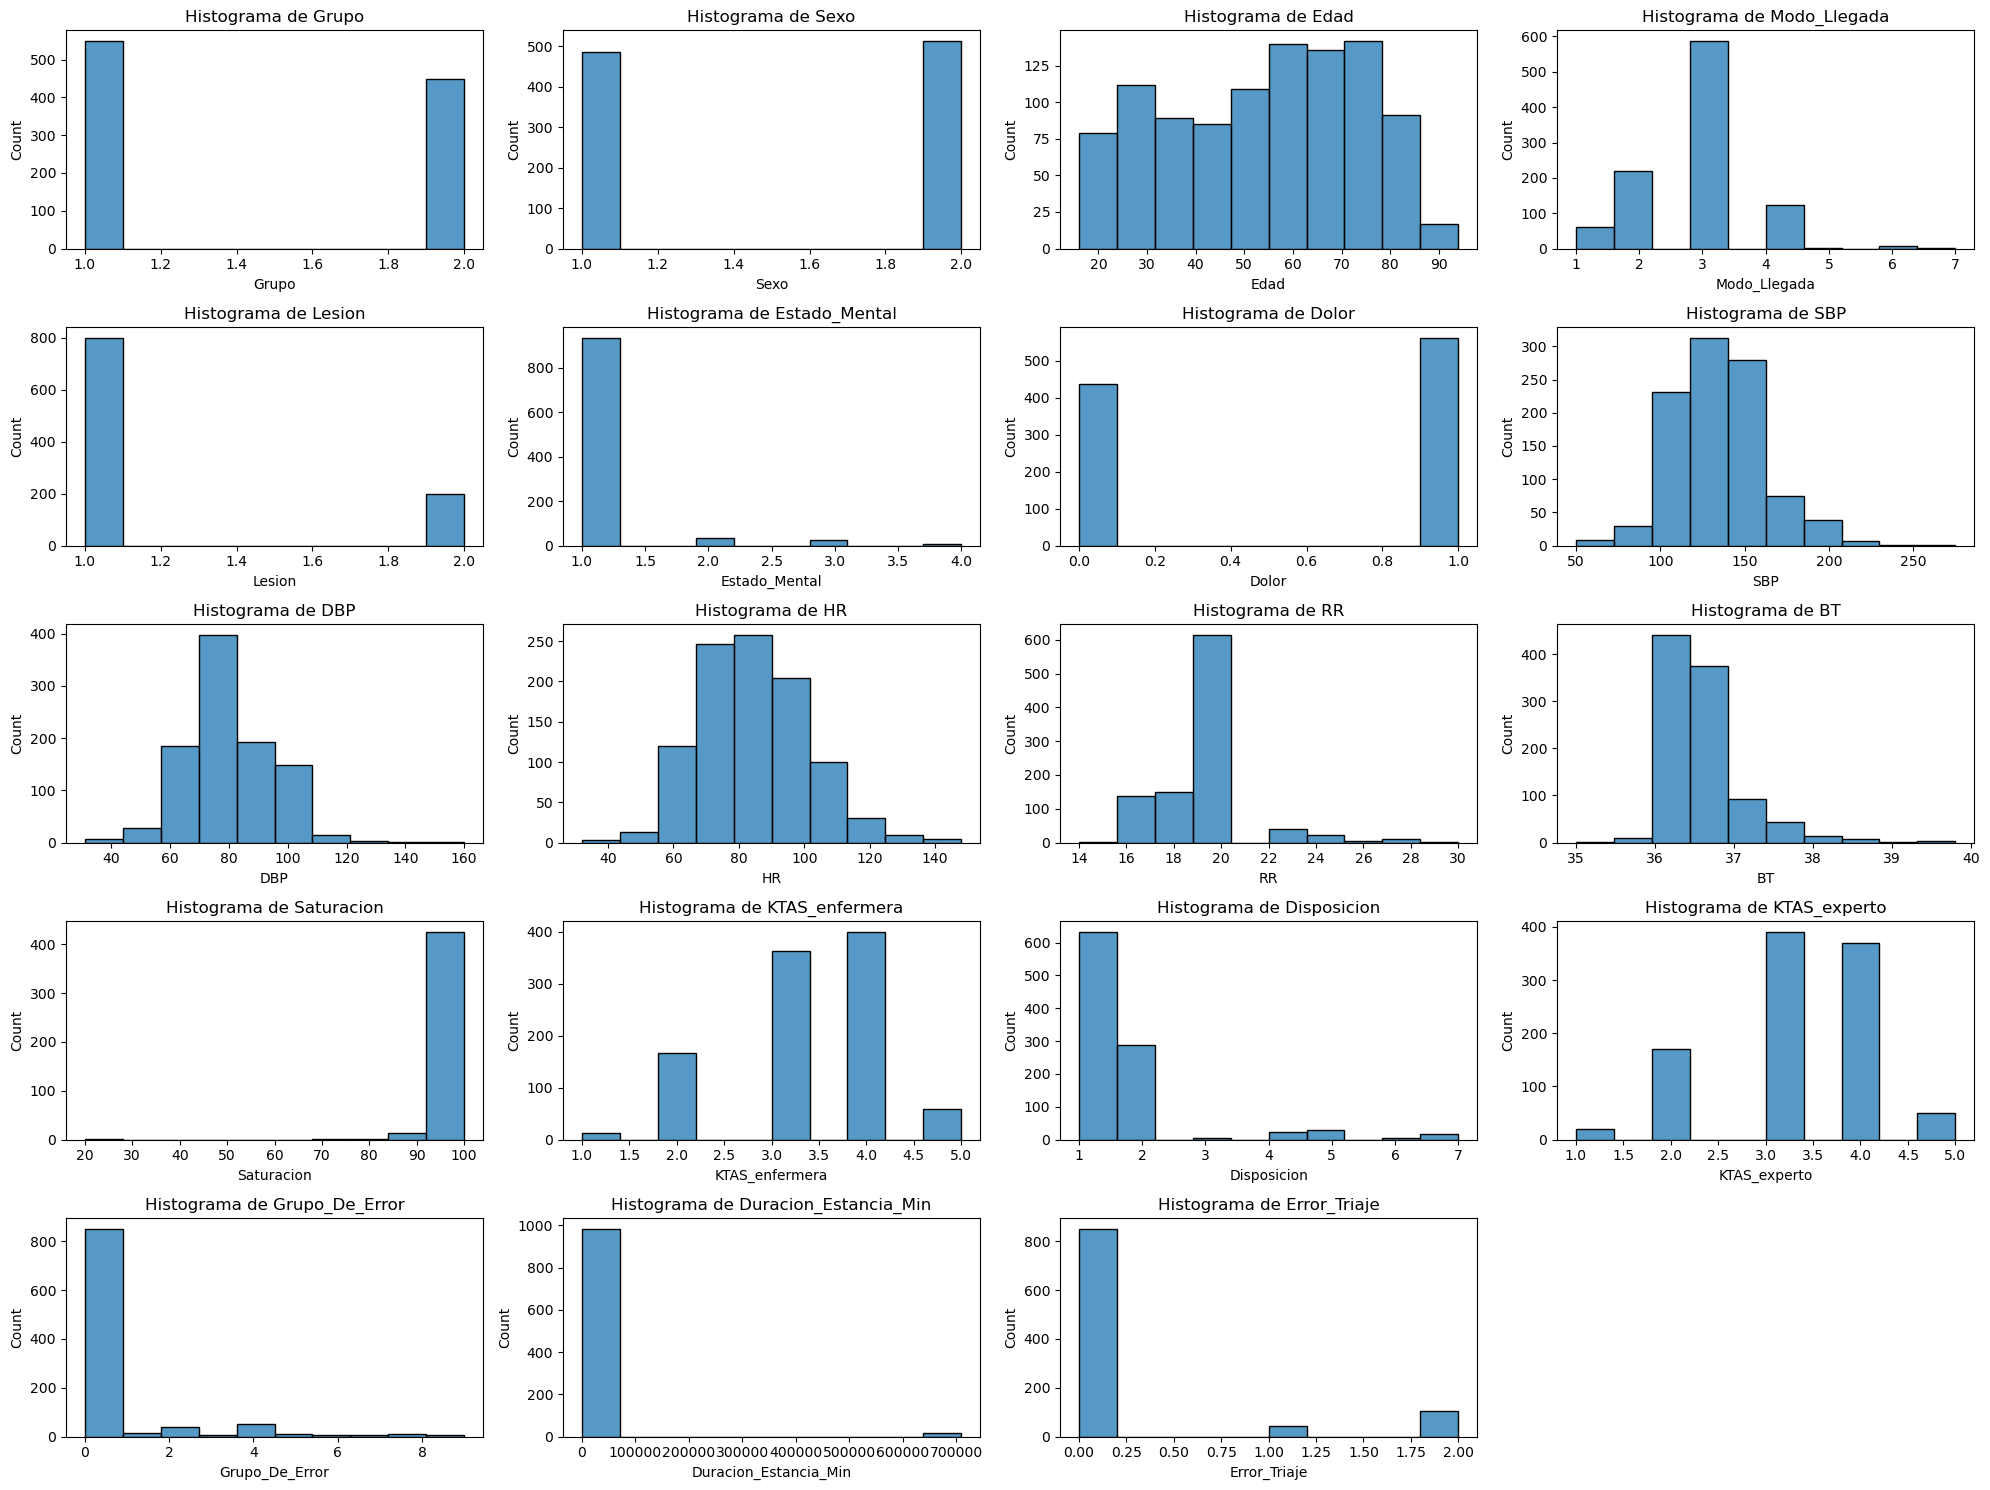

In [171]:

# Lista de características
features = ['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental', 
            'Dolor', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturacion', 
            'KTAS_enfermera', 'Disposicion', 'KTAS_experto', 
            'Grupo_De_Error', 'Duracion_Estancia_Min', 'Error_Triaje']

plt.figure(figsize=(20, 15)) 

for i, feature in enumerate(features):
    plt.subplot(5, 4, i+1)  # Crear subplots en una cuadrícula de 5 filas y 4 columnas
    sns.histplot(data=df, x=feature, kde=False, bins=10)  # Crear histograma
    plt.title(f'Histograma de {feature}')
    plt.tight_layout()

# Mostrar la gráfica
plt.show()


#### Niveles de variables categóricas

In [172]:
categoricas=['Grupo','Sexo','Modo_Llegada',"Lesion",'Queja_Principal','Estado_Mental','Dolor','dolor_NRS','KTAS_enfermera','Diagnostico_En_Urgencias','Disposicion','KTAS_experto','Grupo_De_Error','Error_Triaje']
data_categorica=df[categoricas]

levels = data_categorica.apply(pd.Series.unique)
num_levels = data_categorica.apply(pd.Series.nunique)

print(levels)
print(num_levels)

Grupo                                                                  [2, 1]
Sexo                                                                   [2, 1]
Modo_Llegada                                            [2, 4, 3, 1, 6, 5, 7]
Lesion                                                                 [1, 2]
Queja_Principal             [ant. chest pain, headache, fever & chill, dys...
Estado_Mental                                                    [1, 4, 2, 3]
Dolor                                                                  [1, 0]
dolor_NRS                              [2, 4, 3, #BOÞ!, 6, 5, 7, 8, 1, 9, 10]
KTAS_enfermera                                                [2, 3, 4, 1, 5]
Diagnostico_En_Urgencias    [Ischaemic chest pain, Subarachnoid haemorrhag...
Disposicion                                             [2, 7, 1, 5, 6, 3, 4]
KTAS_experto                                                  [2, 3, 4, 1, 5]
Grupo_De_Error                                 [0, 4, 1, 2, 6, 7

Debido a que el método `describe()` no nos proporciona información útil sobre las variables categóricas, investigaremos los niveles y el número de niveles por variable categórica. Esto nos permitirá comparar la información con el diccionario de datos y tomar decisiones informadas para la limpieza de datos y la selección de variables. Es posible observar las siguientes cosas:

1. **Modo_Llegada**: El diccionario de datos tiene codificación de 1 a 5, pero los datos tienen niveles de 1 a 7.
2. **Dolor**: Está codificado como 0 o 1 en el diccionario de datos; sin embargo, en el dataset existen las categorías 1 y 2.
3. **dolor_NRS**: Tiene un error de formato, "#BOÞ!".
4. **Error_Triaje**: No es binaria, por lo que es necesario preguntar su significado.
5. **Queja_principal y Diagnostico_En_Urgencias**: No se pueden tratar como variables categóricas debido a que tienen demasiados niveles.

#### Análisis de las observaciones:

Como determinamos que dolor_NRS tenía un error de formato, necesitamos saber a cuántas filas afecta este error para decidir cómo proceder. Es posible observar que existen demasiadas instancias del error como para eliminar las filas entonces debemos considerar eliminar la columna o imputar el error.

In [173]:
df['dolor_NRS'].value_counts()

#BOÞ!    440
3        209
4        111
5        109
6         59
2         31
7         27
8          8
10         3
1          2
9          1
Name: dolor_NRS, dtype: int64

El número de errores es bastante alto, pero como también se tiene la columna Dolor, podemos usarla para analizar el significado y la posible intención del recopilador de datos. 

In [174]:
d_dolor = df[df['Dolor']==0]
d_dolor['dolor_NRS'].value_counts()

#BOÞ!    438
Name: dolor_NRS, dtype: int64

Observamos que de las 440 instancias con el error, 438 ocurren cuando el paciente no reporta dolor. Por lo tanto, asumimos que el error se produce cuando el paciente no tiene dolor y no se le asigna un valor de dolor_NRS.

Revisamos los niveles del modo llegada debido a que existen dos niveles que no están explicado en el diccionario de datos.

In [175]:
df['Modo_Llegada'].value_counts()

3    588
2    220
4    122
1     60
6      7
5      2
7      1
Name: Modo_Llegada, dtype: int64

Hay solo 8 instancias con valores de 6 y 7 (que no están especificaods en el diccionario), por lo que podemos asumir que estos datos se pueden incluir en el Modo_Llegada 5.

Revisión de valores faltantes para cada una de las columnas:

In [176]:
# Número de faltantes por columna
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)

Grupo                         0
Sexo                          0
Edad                          0
Modo_Llegada                  0
Lesion                        0
Queja_Principal               0
Estado_Mental                 0
Dolor                         0
dolor_NRS                     0
SBP                          17
DBP                          21
HR                           12
RR                           15
BT                           11
Saturacion                  556
KTAS_enfermera                0
Diagnostico_En_Urgencias      1
Disposicion                   0
KTAS_experto                  0
Grupo_De_Error                0
Duracion_Estancia_Min         0
Duracion_KTAS_Min             0
Error_Triaje                  0
dtype: int64


Las columnas SBP, DBP, HR, RR y BT tienen faltantes.

**Análisis de la variable objetivo:**

Revisión de como se distribuye la variable objetivo. Recordando que existian valores extremos.

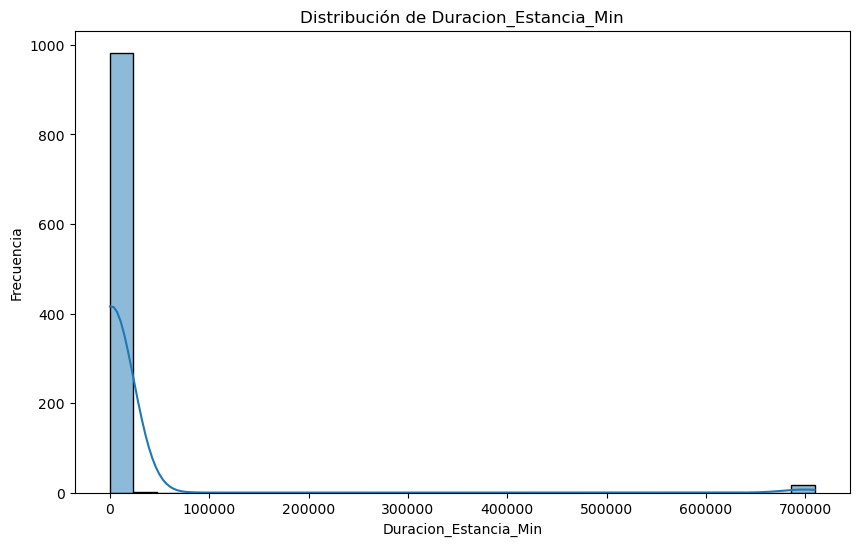

In [177]:

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

In [178]:
df[df["Duracion_Estancia_Min"] >= 10000]["Duracion_Estancia_Min"].count()

57

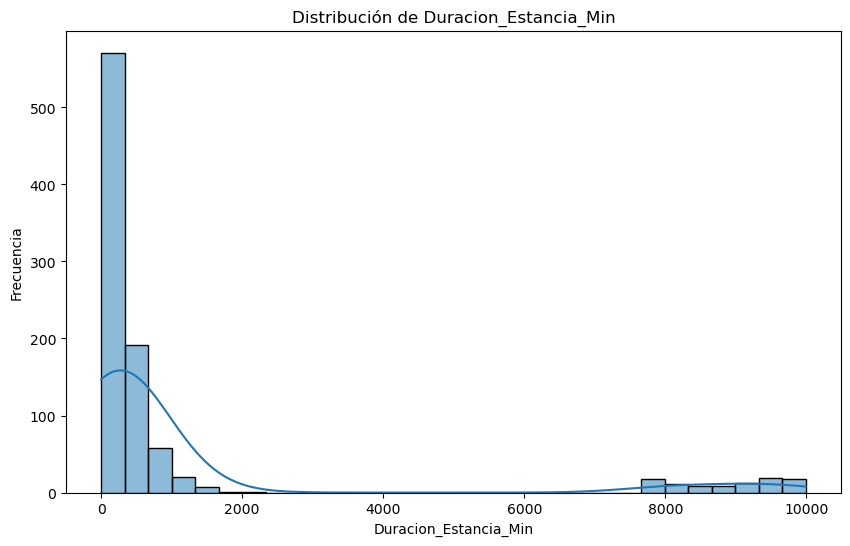

In [179]:

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df[(df["Duracion_Estancia_Min"] >= 0) & (df["Duracion_Estancia_Min"] <= 10000)]["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

In [180]:
df[df["Duracion_Estancia_Min"] >= 2100]["Duracion_Estancia_Min"].count()

151

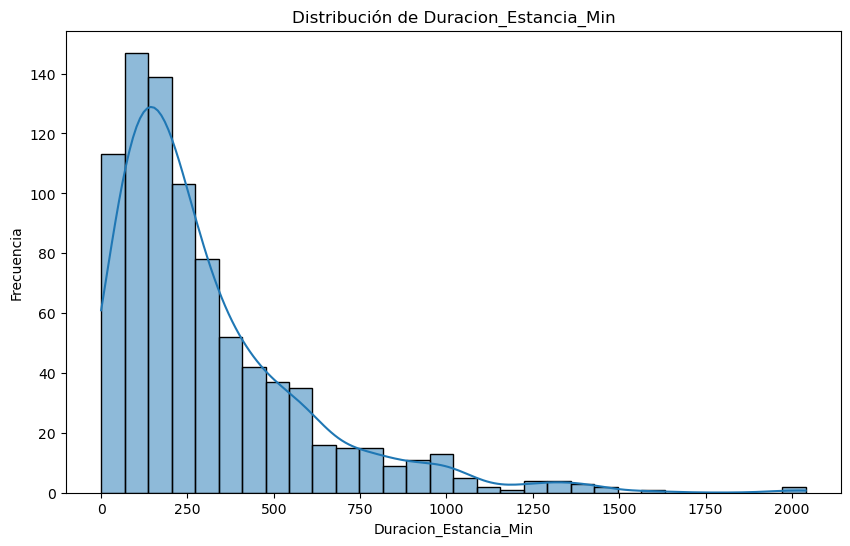

In [181]:

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df[df["Duracion_Estancia_Min"] <= 5000]["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

En las graficas se puede observar que existen valores atípicos que pueden afectar el ajuste del modelo.

### Análisis de Calidad de Datos

##### Valores Faltantes
- **Saturacion**, **BT (Temperatura Corporal)**, **dolor_NRS**, **SBP**, **DBP**, **HR**, **RR**: Tienen valores faltantes.

##### Distribución de Datos
- **Duracion_Estancia_Min**: Muestra alta variabilidad, con algunos valores extremadamente altos que podrían ser atípicos.

##### Valores Atípicos
- **Duracion_Estancia_Min**: Presenta valores extremos que pueden ser errores o casos excepcionales.

##### Consistencia de Datos
- **dolor_NRS**: Muestra un rango amplio (1 a 10) pero con una media baja, lo cual es consistente con el reporte de dolor.


### Limpieza de datos

In [182]:
# Se copia el df para no alterar los datos originales.
data = df.copy()

Se debe convertir la variable Duracion_KTAS_Min a float para que se pueda utilizar en el modelo:

In [183]:
# Conversión de String a float 
data['Duracion_KTAS_Min'] = data['Duracion_KTAS_Min'].str.replace(',', '.').astype(float)
data['Duracion_KTAS_Min'].describe()

count    1000.000000
mean        5.529710
std         3.439131
min         1.000000
25%         3.000000
50%         4.630000
75%         7.020000
max        17.370000
Name: Duracion_KTAS_Min, dtype: float64

Queja_Principal y Diagnostico_En_Urgencias son columnas de texto y no las usaremos en el primer modelo, después exploraremos el procesamiento de texto. \
Por otro lado, la saturación tiene casi la mitad de valores faltantes y por esto decidimos no utilizarla.

In [184]:
# Se quitan las columnas por la cantidad tan alta de categorías
data=data.drop(columns=['Queja_Principal','Diagnostico_En_Urgencias','Saturacion'])

Imputamos el #BOÞ! con 1 para poder usar la columna en el modelo. Esto con base en lo explorado anteriormente.

In [185]:
# Dolor BOP
data['dolor_NRS'] = pd.to_numeric(data['dolor_NRS'].replace('#BOÞ!', 1))

Cambiamos los niveles 6 y 7 de Modo_Llegada a 5 para tener la misma logica del diccionario de datos.

In [186]:
# Modo_Llegada
data['Modo_Llegada'] = data['Modo_Llegada'].replace(6, 5)
data['Modo_Llegada'] = data['Modo_Llegada'].replace(7, 5)
data['Modo_Llegada'].value_counts()

3    588
2    220
4    122
1     60
5     10
Name: Modo_Llegada, dtype: int64

#### Imputación de las filas con valores NaN:

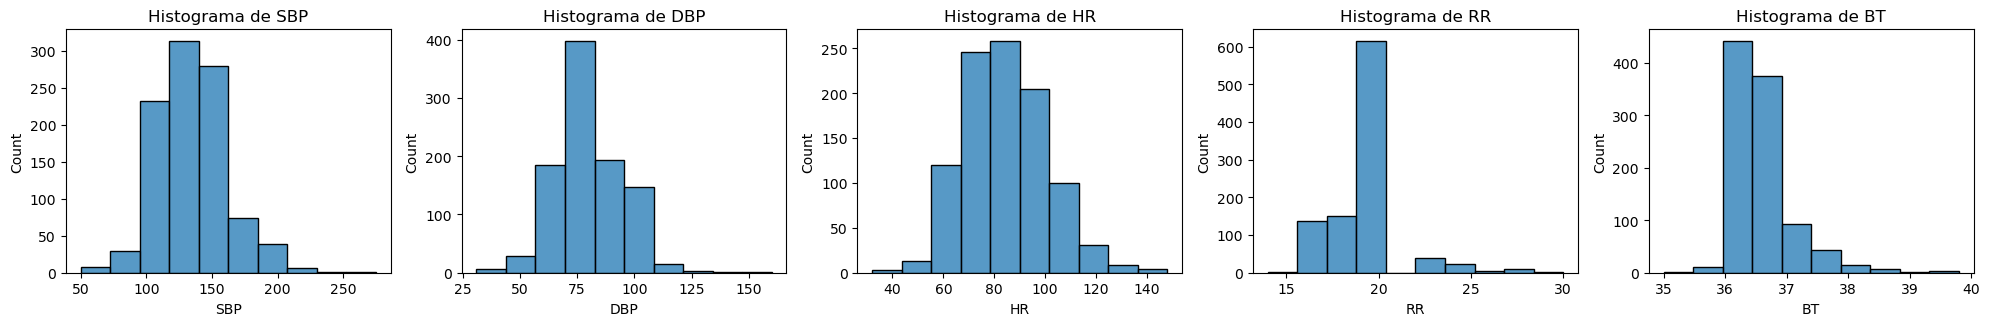

In [187]:
# Lista de características
features = ['SBP', 'DBP', 'HR', 'RR', 'BT']

plt.figure(figsize=(20, 15)) 

for i, feature in enumerate(features):
    plt.subplot(5, 5, i+1)  # Crear subplots en una cuadrícula de 5 filas y 5 columnas
    sns.histplot(data=df, x=feature, kde=False, bins=10)
    plt.title(f'Histograma de {feature}')
    plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [188]:
columnas_imputar = ['SBP', 'DBP', 'HR', 'RR', 'BT']
for columna in columnas_imputar:
    print(columna)
    print(f'Media: {data[columna].mean()}')
    print(f'Mediana: {data[columna].median()}')
    print(f'Moda: {data[columna].mode()[0]}')

SBP
Media: 133.4852492370295
Mediana: 130.0
Moda: 120.0
DBP
Media: 79.56690500510726
Mediana: 80.0
Moda: 80.0
HR
Media: 84.40080971659918
Mediana: 82.0
Moda: 80.0
RR
Media: 19.450761421319797
Mediana: 20.0
Moda: 20.0
BT
Media: 36.56299292214358
Mediana: 36.5
Moda: 36.0


A partir del comportamiento de las características y teniendo en cuenta que estas tienen valores enteros, la medida más precisa para imputar sería la moda, ya que representa el valor que aparece con mayor frecuencia y es más adecuado para este tipo de datos. La media generaría valores decimales que no son acordes a los valores originales, y la mediana también cuando el número de datos es par. 

In [189]:
# Imputar valores NaN con la media de cada columna
for columna in columnas_imputar:
    data[columna] = data[columna].fillna(data[columna].mode()[0])

Decidimos quitar los valores atípicos para mejorar el rendimiento del modelo en los casos mas comunes. Sin embargo, esto significa que el modelo no se funcionará muy bien para valores extremos.

In [190]:
# Eliminar las filas donde Duracion_Estancia_Min > 2100
data = data[data["Duracion_Estancia_Min"] <= 2100]
data["Duracion_Estancia_Min"].describe()

count     849.000000
mean      308.449941
std       285.380122
min         0.000000
25%       118.000000
50%       216.000000
75%       411.000000
max      2040.000000
Name: Duracion_Estancia_Min, dtype: float64

### Selección de Variables para el Modelado

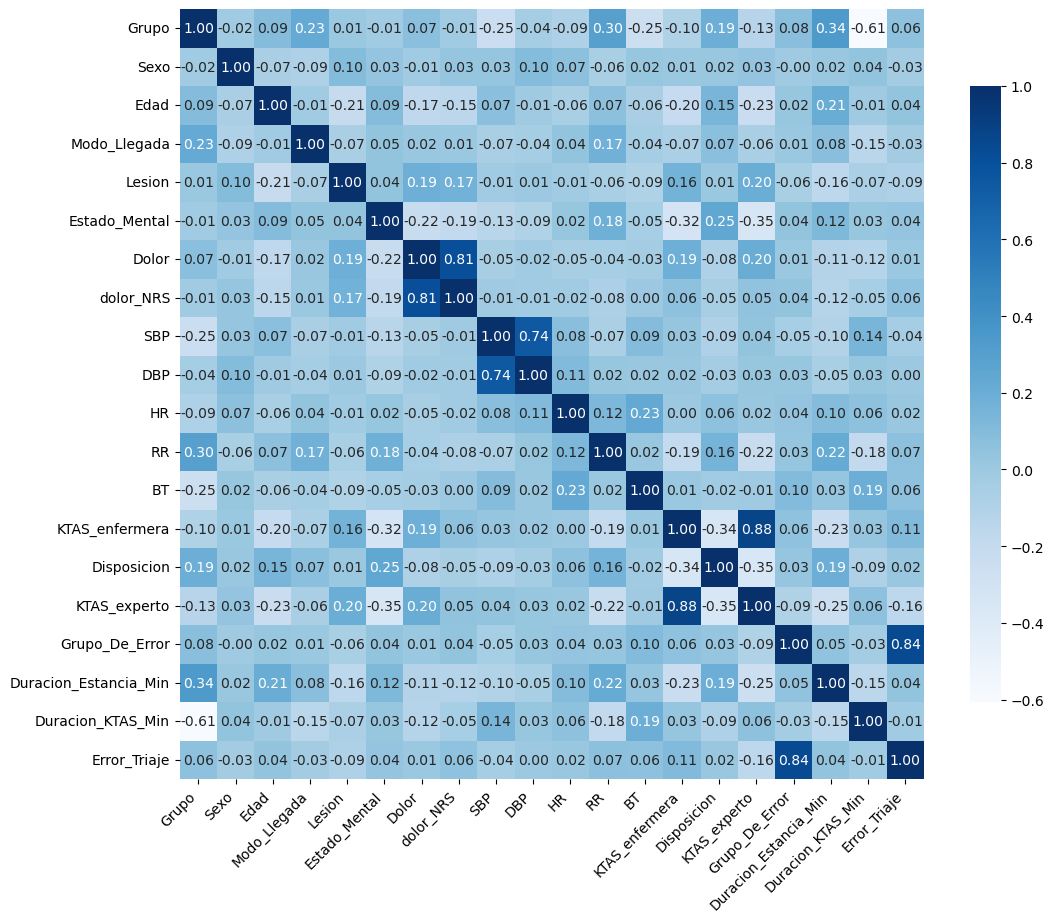

Index(['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental',
       'Dolor', 'dolor_NRS', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'KTAS_enfermera',
       'Disposicion', 'KTAS_experto', 'Grupo_De_Error',
       'Duracion_Estancia_Min', 'Duracion_KTAS_Min', 'Error_Triaje'],
      dtype='object')


In [191]:

# Calculate the correlation matrix
corr = data.corr(numeric_only= True)

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(corr, cmap="Blues", annot=True, annot_kws={"size": 10}, fmt=".2f", 
           cbar_kws={"shrink": 0.8})

# Rotate the x and y labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the plot
plt.show()

print(data.columns)

En la matriz de correlación es posible identificar variables correlacionadas que podrían ser eliminadas ya que una explica a la otra. Las principales son:
- Dolor con Dolor_NRS
- SBP con DBP
- KTAS_enfermera con KTAS_experto
- Grupo_De_Error con Error_Triaje

<Axes: >

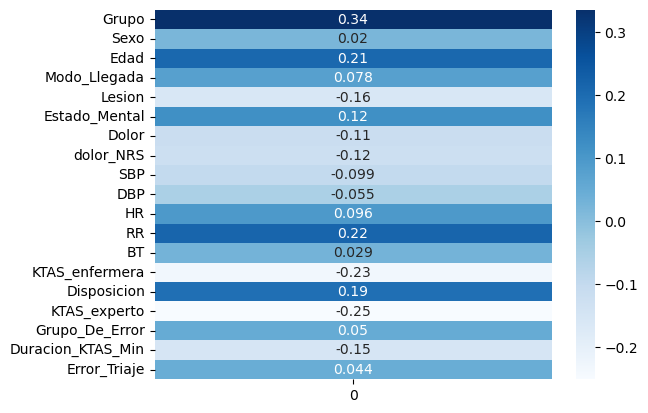

In [192]:
corrw = data.drop(['Duracion_Estancia_Min'], axis=1).corrwith(data['Duracion_Estancia_Min'], numeric_only= True)
sns.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

Según lo observado en la matriz de correlación con la variable objetivo decidimos eliminar las columnas DBP, KTAS_enfermera y Error_Triaje, ya que tienen una menor correlación con la Duracion_Estancia_Min que SBP, KTAS_experto y Grupo_De_Error respectivamente. Además eliminamos dolor_NRS ya que tiene una alta correlación con dolor y dolor está completa y tiene mayor correlación con la variable objetivo.

In [193]:
data=data.drop(columns=['DBP', 'KTAS_enfermera', 'Error_Triaje', 'dolor_NRS', 'Grupo_De_Error'])
data.columns

Index(['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental',
       'Dolor', 'SBP', 'HR', 'RR', 'BT', 'Disposicion', 'KTAS_experto',
       'Duracion_Estancia_Min', 'Duracion_KTAS_Min'],
      dtype='object')

Ajustar los valores de las variables categóricas binarias que tienen valores 1 y 2, para que todas queden unificadas con valores 0 y 1:

In [194]:
data['Grupo'] = data['Grupo'].replace({1: 0, 2: 1})
data['Sexo'] = data['Sexo'].replace({1: 0, 2: 1})
data['Lesion'] = data['Lesion'].replace({1: 0, 2: 1})

One hot encoding para las variables categóricas con más de 2 categorías:

In [195]:
columns_to_encode = ['Disposicion', 'Modo_Llegada', 'Estado_Mental']

# Aplicamos one hot encoding
X = pd.get_dummies(data, columns=columns_to_encode, drop_first=True, dtype=int)

# Visualizamos el DataFrame resultante
X.head()

,Grupo,Sexo,Edad,Lesion,Dolor,SBP,HR,RR,BT,KTAS_experto,Duracion_Estancia_Min,Duracion_KTAS_Min,Disposicion_2,Disposicion_3,Disposicion_4,Disposicion_5,Disposicion_6,Disposicion_7,Modo_Llegada_2,Modo_Llegada_3,Modo_Llegada_4,Modo_Llegada_5,Estado_Mental_2,Estado_Mental_3,Estado_Mental_4
0,1,1,49,0,1,150.0,92.0,20.0,36.2,2,1591,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,30,0,1,140.0,76.0,20.0,36.3,3,211,3.0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,0,61,1,1,100.0,84.0,20.0,36.4,4,119,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,1,61,0,1,120.0,76.0,20.0,36.5,3,414,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,67,0,0,143.0,130.0,20.0,38.1,2,267,3.6,0,0,0,0,0,0,0,1,0,0,0,0,0


Esto se hace para convertir las variables categóricas 'Disposicion', 'Modo_Llegada', 'Estado_Mental' a múltiples columnas binarias (0 y 1) que representan si la instancia pertenece o no a esa categoría en específico. Esto es útil porque la mayoría de los algoritmos de clustering basados en distancias, y crear estas nuevas columnas de categorías binarias evita atribuir relaciones numéricas a categorías que no las tienen.

Esto no se hace para la columna KTAS_expero ya que esta característica sí tiene categorías con relaciones numéricas (entre más alta, más grave la emergencia)

## Implementación de modelos

### Desde aca

In [196]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dataScaled = scaler.fit_transform(data)

dataScaled = pd.DataFrame(dataScaled)
dataScaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,0.352179,0.510012,0.474887,0.437279,0.222615,0.035728,0.565371,0.378621,0.436787,0.331198,0.324794,0.088143,0.580389,0.151201,0.302538
std,0.477931,0.500194,0.253107,0.188785,0.416247,0.148033,0.496000,0.120934,0.141474,0.132374,0.109385,0.185947,0.215690,0.139892,0.216109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.243590,0.250000,0.000000,0.000000,0.000000,0.306667,0.345133,0.250000,0.250000,0.000000,0.500000,0.057843,0.133170
50%,0.000000,1.000000,0.512821,0.500000,0.000000,0.000000,1.000000,0.364444,0.415929,0.375000,0.312500,0.000000,0.500000,0.105882,0.244349
75%,1.000000,1.000000,0.679487,0.500000,0.000000,0.000000,1.000000,0.444444,0.530973,0.375000,0.375000,0.166667,0.750000,0.201471,0.418448
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
X.describe()

,Grupo,Sexo,Edad,Lesion,Dolor,SBP,HR,RR,BT,KTAS_experto,Duracion_Estancia_Min,Duracion_KTAS_Min,Disposicion_2,Disposicion_3,Disposicion_4,Disposicion_5,Disposicion_6,Disposicion_7,Modo_Llegada_2,Modo_Llegada_3,Modo_Llegada_4,Modo_Llegada_5,Estado_Mental_2,Estado_Mental_3,Estado_Mental_4
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,0.352179,0.510012,53.041225,0.222615,0.565371,135.189635,84.356890,19.299176,36.559011,3.321555,308.449941,5.952544,0.240283,0.007067,0.023557,0.018846,0.005889,0.016490,0.228504,0.604240,0.088339,0.011779,0.034158,0.022379,0.009423
std,0.477931,0.500194,19.742313,0.416247,0.496000,27.210233,15.986612,2.117985,0.525049,0.862762,285.380122,3.537711,0.427507,0.083818,0.151754,0.136060,0.076560,0.127425,0.420117,0.489302,0.283955,0.107952,0.181742,0.148001,0.096670
min,0.000000,0.000000,16.000000,0.000000,0.000000,50.000000,35.000000,14.000000,35.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,35.000000,0.000000,0.000000,119.000000,74.000000,18.000000,36.200000,3.000000,118.000000,3.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,56.000000,0.000000,1.000000,132.000000,82.000000,20.000000,36.500000,3.000000,216.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,69.000000,0.000000,1.000000,150.000000,95.000000,20.000000,36.800000,4.000000,411.000000,7.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,94.000000,1.000000,1.000000,275.000000,148.000000,30.000000,39.800000,5.000000,2040.000000,17.370000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [198]:
X.columns

Index(['Grupo', 'Sexo', 'Edad', 'Lesion', 'Dolor', 'SBP', 'HR', 'RR', 'BT',
       'KTAS_experto', 'Duracion_Estancia_Min', 'Duracion_KTAS_Min',
       'Disposicion_2', 'Disposicion_3', 'Disposicion_4', 'Disposicion_5',
       'Disposicion_6', 'Disposicion_7', 'Modo_Llegada_2', 'Modo_Llegada_3',
       'Modo_Llegada_4', 'Modo_Llegada_5', 'Estado_Mental_2',
       'Estado_Mental_3', 'Estado_Mental_4'],
      dtype='object')

In [199]:
from sklearn.decomposition import PCA

pca1 = PCA()
pca_df1 = pd.DataFrame(pca1.fit_transform(dataScaled))

pca1.explained_variance_

array([0.28279487, 0.26493613, 0.24161447, 0.15413491, 0.06550628,
       0.04822233, 0.03301902, 0.02754097, 0.0243816 , 0.02198886,
       0.01790067, 0.01430648, 0.01309143, 0.01190149, 0.00966739])

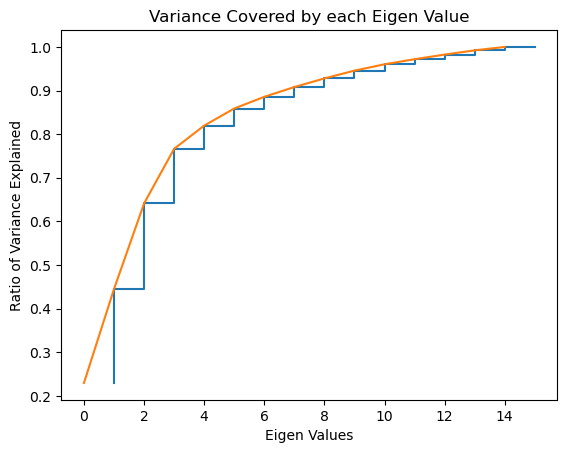

In [200]:
import numpy as np
plt.step(list(range(1,16)), np.cumsum(pca1.explained_variance_ratio_))
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

In [201]:
pca = PCA(n_components = 10) 
pca_df = pca.fit_transform(dataScaled) 
pca_df = pd.DataFrame(pca_df) 
pca_df

,0,1,2,3,4,5,6,7,8,9
0,0.618734,0.040493,0.666581,-0.468542,0.151856,0.201935,-0.298138,0.005435,-0.008366,0.301748
1,0.674938,0.019167,0.640416,-0.398714,0.029230,0.592143,0.138400,0.235425,0.485147,-0.478921
2,0.952157,0.438647,-0.138094,0.641909,0.047822,-0.226118,0.062842,-0.023088,-0.027784,0.026798
3,0.635200,0.010507,0.595468,-0.459942,0.019010,-0.077373,-0.005079,-0.103272,-0.108462,0.007905
4,-0.696612,-0.314477,0.397279,-0.122134,0.148460,0.104947,0.108960,-0.299776,0.113770,0.405113
...,...,...,...,...,...,...,...,...,...,...
844,-0.705040,-0.365908,0.329669,-0.113159,0.055020,-0.169280,0.400216,0.128219,0.078304,-0.137833
845,-0.681244,0.347900,-0.296846,0.155211,-0.275337,0.319839,0.004370,0.027592,0.067921,0.017677
846,0.078820,-0.544280,-0.045146,-0.512105,0.210415,0.145221,-0.203959,-0.237408,-0.081230,0.141633
847,-0.617184,0.318884,-0.330766,0.186135,-0.557003,0.152582,0.016299,-0.194707,0.150820,-0.015798


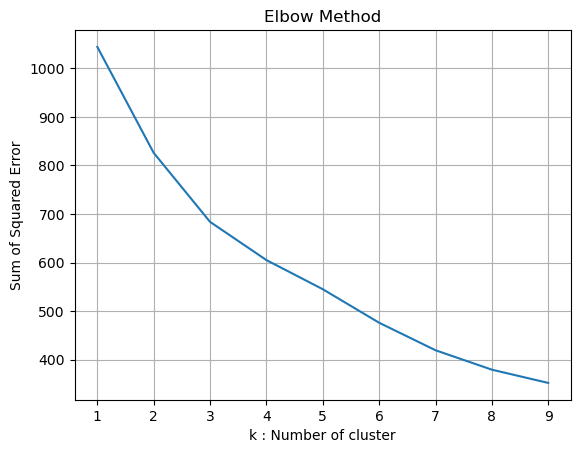

In [202]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
sse = {}


for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(dataScaled)
    sse[k] = kmeans.inertia_ 
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()


plt.show()

Text(0.5, 1.0, 'K-Distance Graph')

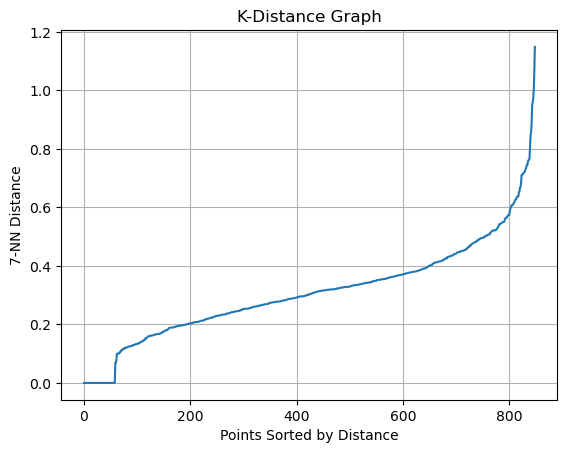

In [203]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors = 8)
model = knn.fit(dataScaled)
distances, indices = knn.kneighbors(dataScaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances)
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph')

In [204]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8)
labels = dbscan.fit_predict(pca_df)


n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")

DBSCAN_dataset = pca_df.copy()
DBSCAN_dataset.loc[:,'Cluster'] = dbscan.labels_ 

Number of clusters found by DBSCAN: 14


In [205]:
import numpy as np
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       dtype=int64),
 array([ 31,  49,  23, 105, 109,  48,  55,  31,  72, 106,  49,  11, 105,
         22,  33], dtype=int64))

In [206]:
DBSCAN_dataset

,0,1,2,3,4,5,6,7,8,9,Cluster
0,0.618734,0.040493,0.666581,-0.468542,0.151856,0.201935,-0.298138,0.005435,-0.008366,0.301748,0
1,0.674938,0.019167,0.640416,-0.398714,0.029230,0.592143,0.138400,0.235425,0.485147,-0.478921,-1
2,0.952157,0.438647,-0.138094,0.641909,0.047822,-0.226118,0.062842,-0.023088,-0.027784,0.026798,1
3,0.635200,0.010507,0.595468,-0.459942,0.019010,-0.077373,-0.005079,-0.103272,-0.108462,0.007905,0
4,-0.696612,-0.314477,0.397279,-0.122134,0.148460,0.104947,0.108960,-0.299776,0.113770,0.405113,2
...,...,...,...,...,...,...,...,...,...,...,...
844,-0.705040,-0.365908,0.329669,-0.113159,0.055020,-0.169280,0.400216,0.128219,0.078304,-0.137833,2
845,-0.681244,0.347900,-0.296846,0.155211,-0.275337,0.319839,0.004370,0.027592,0.067921,0.017677,8
846,0.078820,-0.544280,-0.045146,-0.512105,0.210415,0.145221,-0.203959,-0.237408,-0.081230,0.141633,11
847,-0.617184,0.318884,-0.330766,0.186135,-0.557003,0.152582,0.016299,-0.194707,0.150820,-0.015798,8


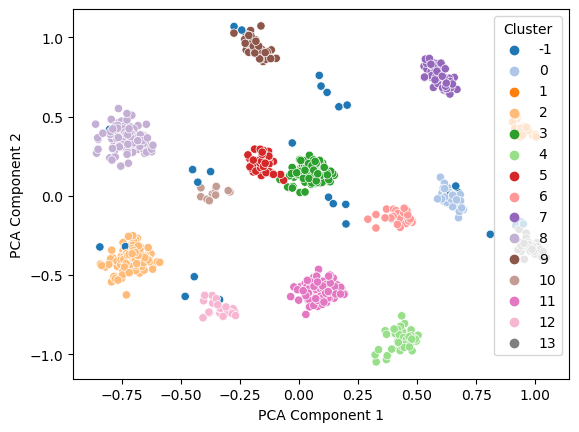

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

features = DBSCAN_dataset.drop(columns='Cluster')
clusters = DBSCAN_dataset['Cluster']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

pca_df2 = pd.DataFrame(pca_result, columns=['PCA Component 1', 'PCA Component 2'])
pca_df2['Cluster'] = clusters
data['Cluster']= clusters

sns.scatterplot(data=pca_df2, x='PCA Component 1', y='PCA Component 2', hue='Cluster', palette='tab20')

plt.show()


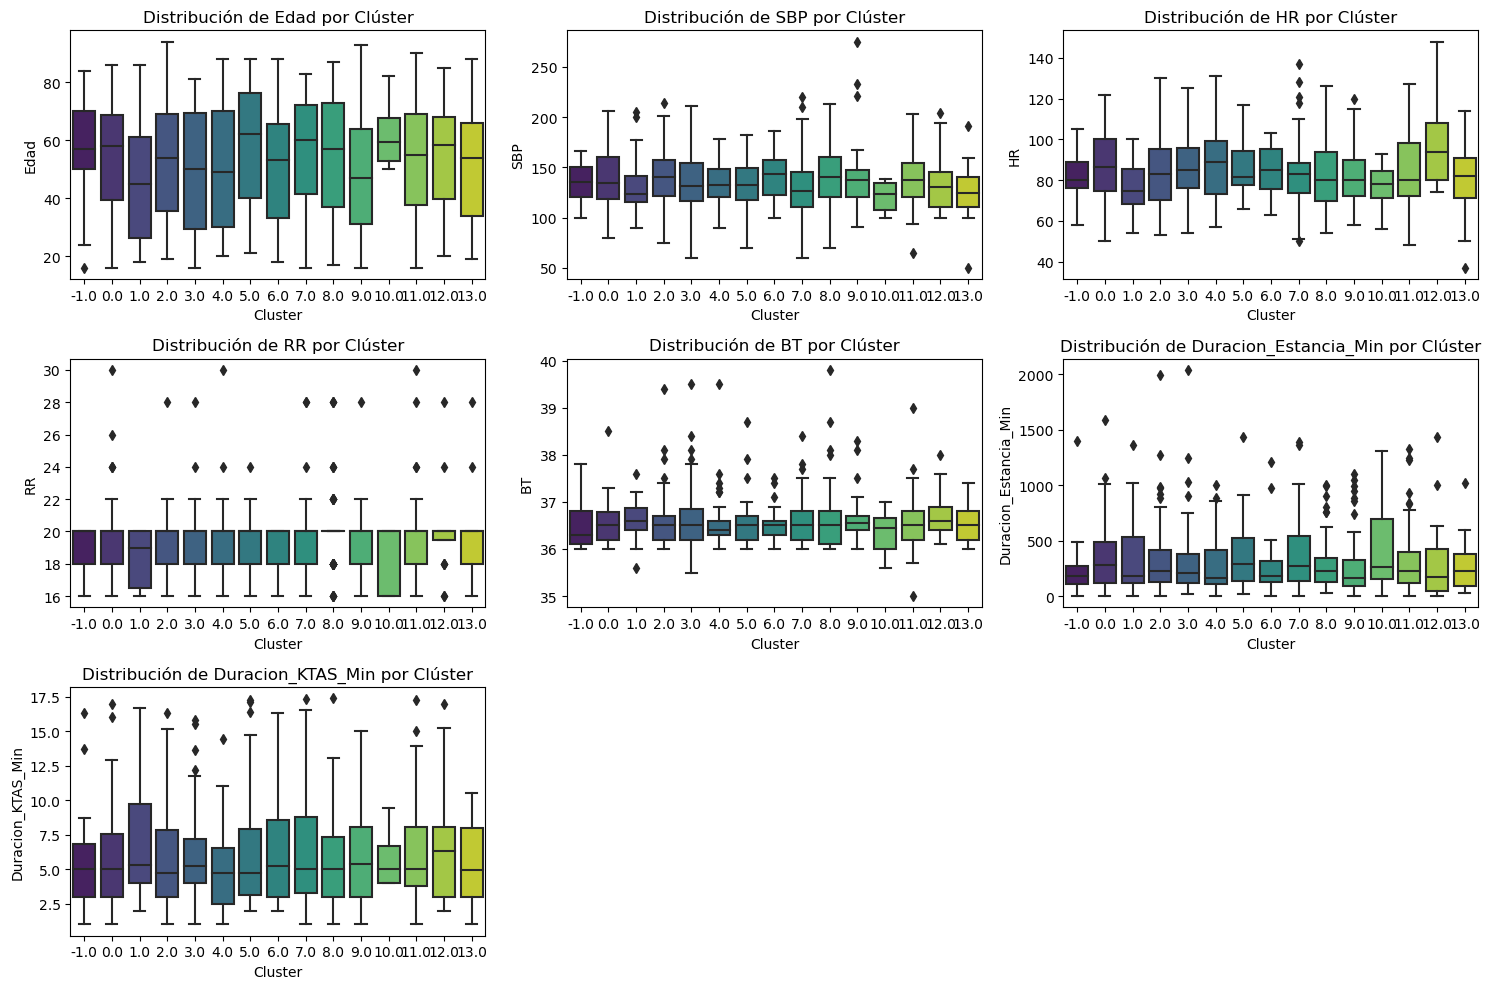

In [208]:

import seaborn as sns
import matplotlib.pyplot as plt

# Crear subplots para comparar las características en cada cluster
features = [ 'Edad',  'SBP', 'HR', 'RR', 'BT', 'Duracion_Estancia_Min', 'Duracion_KTAS_Min']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')
    plt.title(f'Distribución de {feature} por Clúster')
    plt.tight_layout()

plt.show()


In [209]:
data.columns

Index(['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental',
       'Dolor', 'SBP', 'HR', 'RR', 'BT', 'Disposicion', 'KTAS_experto',
       'Duracion_Estancia_Min', 'Duracion_KTAS_Min', 'Cluster'],
      dtype='object')

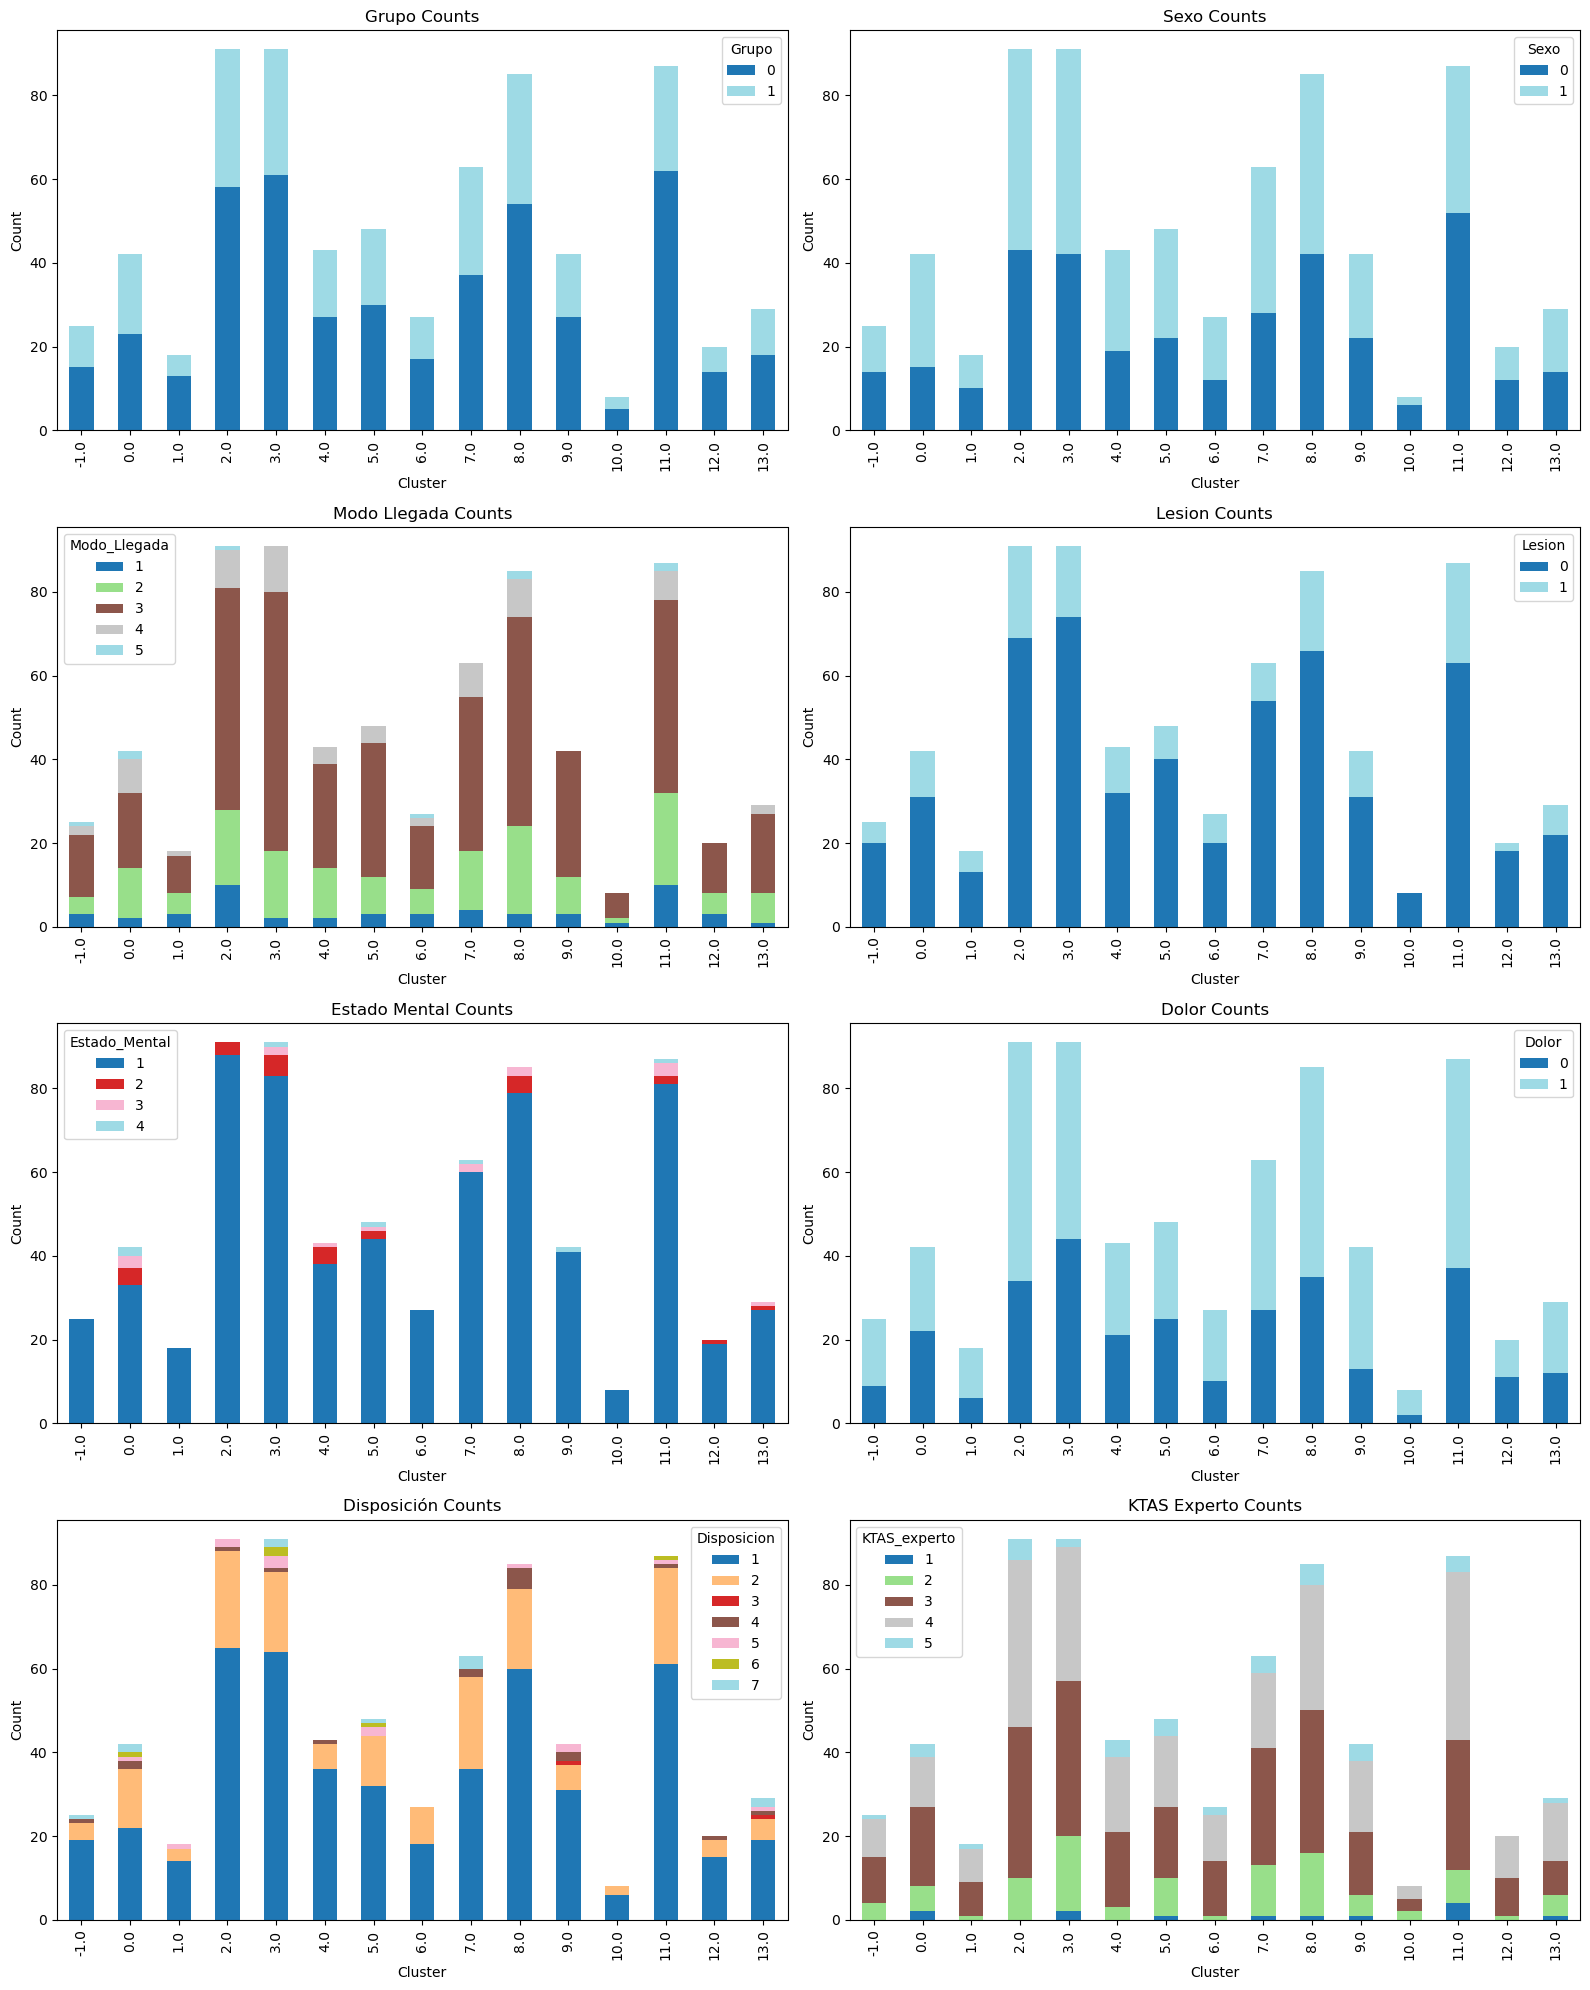

In [210]:


import matplotlib.pyplot as plt
import seaborn as sns


grupo_counts = data.groupby('Cluster')['Grupo'].value_counts().unstack(fill_value=0)
sexo_counts = data.groupby('Cluster')['Sexo'].value_counts().unstack(fill_value=0)
modo_counts = data.groupby('Cluster')['Modo_Llegada'].value_counts().unstack(fill_value=0)
lesion_counts = data.groupby('Cluster')['Lesion'].value_counts().unstack(fill_value=0)
estado_counts = data.groupby('Cluster')['Estado_Mental'].value_counts().unstack(fill_value=0)
dolor_counts = data.groupby('Cluster')['Dolor'].value_counts().unstack(fill_value=0)
disposicion_counts = data.groupby('Cluster')['Disposicion'].value_counts().unstack(fill_value=0)
ktas_counts = data.groupby('Cluster')['KTAS_experto'].value_counts().unstack(fill_value=0)



count_data = [
    (grupo_counts, 'Grupo Counts'),
    (sexo_counts, 'Sexo Counts'),
    (modo_counts, 'Modo Llegada Counts'),
    (lesion_counts, 'Lesion Counts'),
    (estado_counts, 'Estado Mental Counts'),
    (dolor_counts, 'Dolor Counts'),
    (disposicion_counts, 'Disposición Counts'),
    (ktas_counts, 'KTAS Experto Counts')
]

n_rows = 4
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 20))

axes = axes.flatten()

for i, (count_df, title) in enumerate(count_data):
    count_df.plot(kind='bar', stacked=True, ax=axes[i], cmap='tab20')
    axes[i].set_title(title)
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


### Tablero de datos

(por ahora con agglomerate pero toca cambiarlo)

In [212]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


# DBSCAN Clustering
sil_score_dbscan = silhouette_score(X, labels)
db_score_dbscan = davies_bouldin_score(X, labels)
ch_score_dbscan = calinski_harabasz_score(X, labels)


print(f"DBSCAN Clustering: Silhouette: {sil_score_dbscan}, Davies-Bouldin: {db_score_dbscan}, Calinski-Harabasz: {ch_score_dbscan}")


DBSCAN Clustering: Silhouette: -0.2959892523653636, Davies-Bouldin: 12.5840139216391, Calinski-Harabasz: 13.733848104130594
